# Project 4 -- Zeru Zhou

**TA Help:** NA


    
**Collaboration:** NA
    
- Got help from Dr. Ward's videos

## Question 1

In [7]:
import pandas as pd

In [8]:
my_df = pd.read_csv("/depot/datamine/data/stackoverflow/unprocessed/2021.csv")

In [3]:
from block_timer.timer import Timer

In [10]:
with Timer(title="csv") as t1:
    my_df.to_csv("/scratch/brown/zhou902/2021.csv", index = False)
with Timer(title="parquet") as t2:
    my_df.to_parquet("/scratch/brown/zhou902/2021.parquet", index = False)
with Timer(title="feather") as t3:
    my_df.to_feather("/scratch/brown/zhou902/2021.feather")

print(t1.elapsed)
print(t2.elapsed)
print(t3.elapsed)
print(f'Parquet: {t2.elapsed/t1.elapsed:.1%}')
print(f'Feather: {t3.elapsed/t1.elapsed:.1%}')

[csv] Total time 2.25361 seconds.
[parquet] Total time 0.41709 seconds.


2.253605325706303
0.41709266416728497
0.33891418669372797
Parquet: 18.5%
Feather: 15.0%


[feather] Total time 0.33891 seconds.


In [12]:
with Timer(title="csv") as t1:
    pd.read_csv("/scratch/brown/zhou902/2021.csv")
with Timer(title="parquet") as t2:
    pd.read_parquet("/scratch/brown/zhou902/2021.parquet")
with Timer(title="feather") as t3:
    pd.read_feather("/scratch/brown/zhou902/2021.feather")

print(t1.elapsed)
print(t2.elapsed)
print(t3.elapsed)
print(f'Parquet: {t2.elapsed/t1.elapsed:.1%}')
print(f'Feather: {t3.elapsed/t1.elapsed:.1%}')

[csv] Total time 0.95159 seconds.


0.9515923364087939
0.34658367838710546
0.17277581617236137
Parquet: 36.4%
Feather: 18.2%


[parquet] Total time 0.34658 seconds.
[feather] Total time 0.17278 seconds.


In [13]:
from pathlib import Path

In [16]:
print(f'csv: {Path("/scratch/brown/zhou902/2021.csv").stat().st_size/1000000}')
print(f'parquet: {Path("/scratch/brown/zhou902/2021.parquet").stat().st_size/1000000}')
print(f'feather: {Path("/scratch/brown/zhou902/2021.feather").stat().st_size/1000000}')

csv: 79.910042
parquet: 5.414069
feather: 25.78445


In writting, parquet is 18.5% of csv and feather is 15.0% of csv. In reading, parquet is 36.4% of csv and feather is 18.2% of csv. The sizes in MB are displayed above.

## Question 2

In [31]:
my_df.loc[my_df['US_State']=="Indiana", "Gender"].value_counts()

Man                                                      185
Woman                                                     14
Prefer not to say                                          2
Or, in your own words:                                     2
Non-binary, genderqueer, or gender non-conforming          1
Man;Non-binary, genderqueer, or gender non-conforming      1
Man;Or, in your own words:                                 1
Name: Gender, dtype: int64

<AxesSubplot:>

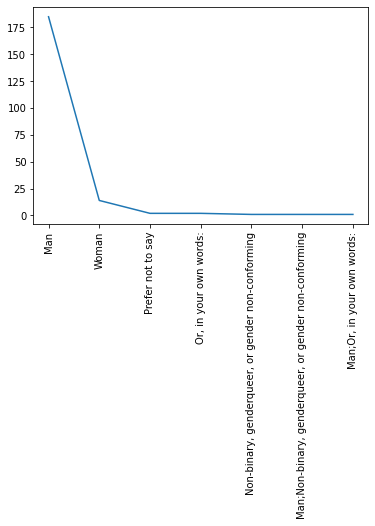

In [34]:
my_df.loc[my_df['US_State']=="Indiana", "Gender"].value_counts().plot(rot=90)

Value_counts is applied and plot is made.

## Question 3

In [3]:
my_df["ConvertedCompYearly"].unique()

array([  62268.,      nan,   51552., ..., 4300000.,  160500.,  816816.])

In [4]:
my_df['YearsCode']=my_df['YearsCode'].astype('str')
my_df['YearsCode']=my_df['YearsCode'].replace("[^0-9]", "", regex = True)
my_df['YearsCode']=pd.to_numeric(my_df['YearsCode'])

<AxesSubplot:xlabel='YearsCode', ylabel='ConvertedCompYearly'>

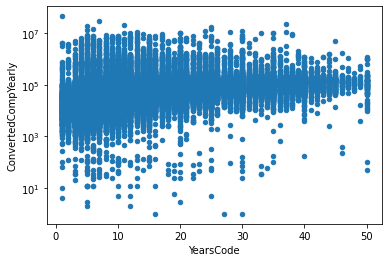

In [6]:
my_df.plot(x='YearsCode', y="ConvertedCompYearly", kind = 'scatter', logy = True)

As the YearsCode becomes larger, the range of "ConvertedCompYearly" becomes smaller.

## Question 4

In [11]:
my_df["LanguageHaveWorkedWith"].unique()

array(['C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift',
       'JavaScript;Python', 'Assembly;C;Python;R;Rust', ...,
       'Java;JavaScript;Kotlin;Objective-C;TypeScript',
       'Clojure;Kotlin;SQL', 'Delphi;Elixir;HTML/CSS;Java;JavaScript'],
      dtype=object)

In [13]:
my_df["LanguageHaveWorkedWith"] = my_df["LanguageHaveWorkedWith"].astype(str)

In [14]:
def flatten (List):
    return (item for sublist in List for item in sublist)

In [16]:
pd.Series(flatten(my_df["LanguageHaveWorkedWith"].str.split(";"))).value_counts()

JavaScript     53587
HTML/CSS       46259
Python         39792
SQL            38835
Java           29162
Node.js        27975
TypeScript     24909
C#             22984
Bash/Shell     22385
C++            20057
PHP            18130
C              17329
PowerShell      8871
Go              7879
Kotlin          6866
Rust            5799
Ruby            5569
Dart            4965
Assembly        4632
Swift           4204
R               4185
VBA             3847
Matlab          3846
Groovy          2479
Objective-C     2310
Scala           2148
Perl            2028
Haskell         1749
Delphi          1731
Clojure         1552
Elixir          1438
LISP            1096
nan             1082
Julia           1068
F#               804
Erlang           651
APL              536
Crystal          466
COBOL            437
dtype: int64

Times listed above. I worked with R, python, SQL, and matlab.

## Question 5

In [17]:
my_df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [18]:
my_df["SurveyEase"].unique()

array(['Easy', 'Neither easy nor difficult', nan, 'Difficult'],
      dtype=object)

In [19]:
my_df["SurveyEase"] = my_df["SurveyEase"].astype(str)

In [22]:
my_df.loc[my_df["US_State"]=="Indiana", "SurveyEase"].value_counts()

Easy                          173
Neither easy nor difficult     33
nan                             1
Difficult                       1
Name: SurveyEase, dtype: int64

<AxesSubplot:>

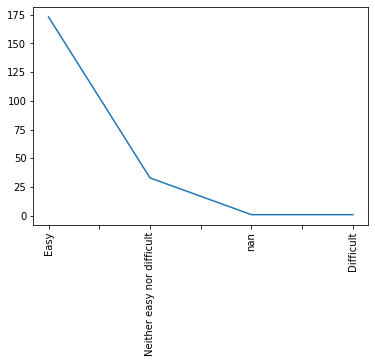

In [23]:
my_df.loc[my_df["US_State"]=="Indiana", "SurveyEase"].value_counts().plot(rot = 90)

Here is how Indiana people reacted about the Survey Ease. Most people regard it as "Easy", according to the plot.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.